Preparing data for model training

In [25]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

digits = load_digits()
scaler = StandardScaler()
x_scaled = scaler.fit_transform(digits.data)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, digits.target, test_size=0.3)

In [26]:
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(hidden_layer_sizes=(150, 100, 50),
                        activation='relu',
                        max_iter=500)
mlp_clf.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=500)

Displaying results

In [27]:
from sklearn.metrics import (classification_report,
                            confusion_matrix,
                            accuracy_score,
                            precision_score,
                            recall_score)

y_pred = mlp_clf.predict(x_test)
y_proba = mlp_clf.predict_proba(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
class_report = classification_report(y_test, y_pred, digits=3)

print(f"\nStats per class:")
print(class_report)


Stats per class:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        51
           1      0.922     1.000     0.959        47
           2      0.982     1.000     0.991        56
           3      1.000     1.000     1.000        49
           4      0.981     1.000     0.991        53
           5      1.000     0.948     0.973        58
           6      0.980     0.980     0.980        50
           7      0.985     0.985     0.985        65
           8      1.000     0.926     0.962        68
           9      0.933     0.977     0.955        43

    accuracy                          0.980       540
   macro avg      0.978     0.982     0.980       540
weighted avg      0.981     0.980     0.980       540



Plotting confusion matrix

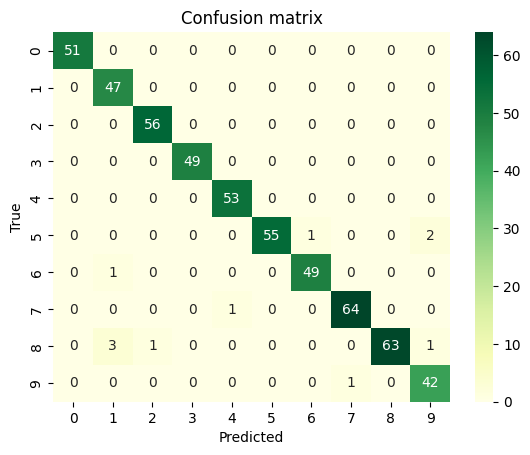

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='YlGn',
            xticklabels=range(10),
            yticklabels=range(10))
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks()
plt.yticks()
plt.show()